#**Projeto de análise de dados Ebac | Estudo de análise de crédito com foco na inadimplência**
---

<br>

Aluno [Willian Campos](https://www.linkedin.com/in/willian-campos-498550b2/)



# **Tópicos**
---

<ol type="1">
  <li>Introdução e métodologia;</li>
  <li>Exploração dos dados;</li>
  <li>Manipulação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Conclusões.</li>
</ol>







## 1\. Introdução e métodologia

Esse é um projeto de estudo, com foco no desenvolvimento de habilidades na análise de dados com uso da biblioteca Pandas para manipular e transformar dados em um DataFrame usando funções de filtro, seleção, agrupamento, dentre outros e da biblioteca Seaborn para fornecer uma interface de alto nível para criação de gráficos estatísticos atraentes e informativos, além da capacidade analítica de correlacionar informações e tirar conclusões estatísticas.

A base de dados a ser trabalhada será um arquivo no formato CSV presente nesse [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv) que é um arquivo no formato de linhas e colunas, perfeito para manipular dados, montar gráficos e poder fazer analises visuais. Os dados contidos são informações sobre clientes de uma instituição financeira e a coluna de interesse será a coluna **default**, que é a coluna que indica se um cliente é adimplente (`default = 0`) ou inadimplente (`default = 1`), ou seja, se o cliente honra ou não com suas dívidas e as conclusões vão ser tomadas levando em consideração as demais colunas como:



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Então o *default* vai ser nossa variável resposta, que é a variável que vamos tentar explicar e as demais colunas vão ser nossas variáveis explicativas, que vamos usar para entender porque um cliente é (`default = 0`) ou (`default = 1`)

A coluna ID não vai ser explorada pois é utilizada para fins de identificação de um cliente especifico e queremos ver uma amostragem de dados ou até todos dados ao mesmo tempo e será removido também a coluna sexo  para evitar a discriminação de gênero, já que a inclusão do gênero pode levar a vieses e preconceitos, o que vai contra a [Lei geral de Proteção de Dados](https://www.gov.br/cidadania/pt-br/acesso-a-informacao/lgpd#:~:text=A%20Lei%20Geral%20de%20Prote%C3%A7%C3%A3o,da%20personalidade%20de%20cada%20indiv%C3%ADduo.).

## 2\. Exploração dos Dados

### 2\.1 Imports e Arquivos


Foi adicionado mais de um valor vazio, porque o valor de vazio já chegou a variar entre `na` e `NaN` em sua estrutura. 

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values=['na', '', 'NaN', 'none']) # Valores que podem ser considerados vazios
df = df.drop('sexo', axis = 1).drop('id', axis = 1) # Removendo colunas de não interesse
df_default_0 = df[df['default']==0] # Criando variável para simplificar ao trabalhar com default 0 
df_default_1 = df[df['default']==1] # Criando variável para simplificar ao trabalhar com default 1


### 2\.2 Visualização dos Dados


Aqui podemos observar que temos valores vazios no estado_civil e escolaridade, mas como se trata de uma amostra de 10 itens, é necessário verificar se os valores vazios estão em outras colunas e talvez fazer uma limpeza dos dados futuramente.


In [245]:
df.head(n = 10)

,default,idade,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,0,49,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,0,51,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,0,40,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,0,40,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,0,44,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,0,51,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,0,32,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,0,37,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,0,48,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


### 2\.3 Estrutura dos Dados

In [246]:
df.shape # Quantidade linhas e quantidade colunas de todo Data Frame (arquivo csv)

(10127, 14)

In [247]:
df[df['default'] == 0].shape # Quantidade dos adimplentes (default == 0)


(8500, 14)

In [248]:
df[df['default'] == 1].shape # # Quantidade dos inadimplentes (default == 1)

(1627, 14)

In [249]:
q_total, _ = df.shape 
q_adimplentes, _ = df[df['default'] == 0].shape 
q_inadimplentes, _ = df[df['default'] == 1].shape

print(f'Proporção é de: {round((q_adimplentes/q_total)*100, 2)}%  de adimplentes e {round((q_inadimplentes/q_total)*100, 2)}% de inadimplentes')

Proporção é de: 83.93%  de adimplentes e 16.07% de inadimplentes


#### 2\.3.3 Tipo dos Dados

Observando os tipos dos dados e a amostra dos dados visto anteriormente, é possível perceber que as colunas limite_credito e valor_transacoes_12m estão no formato de object, ou seja, uma string e vai ser necessário alterar para float para que sejam feitas analises estatísticas com esses valores. Isso acontece porque os números estão no formato brasileiro com ponto e vírgula e o python não trabalha com vírgulas nos números, apenas ponto para separar casas decimais.

O salário anual também está como string, porém essa coluna realmente está trabalhando com string como visto no df.head executado acima.

 - Tipo de dado das colunas

In [250]:
df.dtypes

default                     int64
idade                       int64
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

- Atributos Categóricos (não numéricos)

É percebido que o estado civil, escolaridade e salario anual tem valores vazios devido a coluna count não representar a quantidade total de 10127 valores e a coluna unique ter um valor a mais em cada uma, que é exatamente o `na` ou `NaN` sendo somado em cada coluna. (O valor vazio pode ser representado por qualquer outro tipo de valor diferente dos representados nas colunas)

Fica claro também que mais de 90% dos clientes são cartão do tipo blue e que mais de 35% tem salário anual menor de 40000. Podemos confirmar com os códigos abaixo:

count: quantidade de amostras/ unique: valores possíveis (exemplo: sexo = m ou f = 2) / top: moda / freq: frequencia

In [251]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [252]:
q_blue, _ = df[df['tipo_cartao'] == 'blue'].shape
q_salario_anual40, _ = df[df['salario_anual'] == 'menos que $40K'].shape
print(f'Proporção do cartão blue é de {round((q_blue / q_total) * 100, 2)}%')
print(f'Proporção de salario anual menor que 40k é de {round((q_salario_anual40 / q_total) * 100, 2)}%')

Proporção do cartão blue é de 93.18%
Proporção de salario anual menor que 40k é de 35.16%


Executando o .isna() que retorna um data frame parelho ao data frame que foi utilizado, só que com valores booleanos (verdadeiro ou falso) nas posições, onde o True quer dizer que tem valor nulo e false que tem valor não nulo, o any() retorna esse valor se caso pelo menos uma linha da coluna tiver True. Sendo assim, conseguimos confirmar que a escolaridade, estado_civil e salario_anual tem valores nulos.

In [253]:
df.isna().any()

default                    False
idade                      False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [254]:
dfna = df.isna() 
dfna.head(n = 5) # O retorno do isna para título de curiosidade, coluna estado_civil, linha 3 contem um valor nulo.

,default,idade,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- Atributos Numéricos

count: quantidade de amostras/ mean: média / std: desvio padrão / min: menor valor / 25%: primeiro quartil / 50%: mediana / 75%: terceiro quartil / max: maior valor

In [255]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### 2\.4 Dados Faltantes


O volume de dados faltantes pode inferir diretamente nas conclusões tomadas de maneira negativa, a falta da informação pode causar uma desinformação porque não sabemos ao certo o valor real daquele dado que está em vazio, caso o volume de dados faltantes seja o mesmo ou similar entre adimplentes e inadimples eles devem ser removidos para análise sem atrapalhar o volume total.

Aqui é feito a relação de dados vazios como visto anteriormente nas colunas `escolaridade`, `estado_civil` e `salario_anual`, verificando se a quantidade da dados vazios é o mesmo ou muito próximo entre clientes adimplentes e inadimplentes.



In [256]:
total_adimplentes, _ = df[df['default'] == 0].shape   # Total de adimplentes
total_inadimplentes, _ = df[df['default'] == 1].shape # Total de inadimplentes
# Faltantes total
vazio_total = df.isna().sum().sum()

# Faltantes Escolaridade
vazio_escolaridade = df['escolaridade'].isna().sum()
vazio_escolaridade_adimplentes = df.loc[df['default'] == 0, 'escolaridade'].isna().sum()
vazio_escolaridade_inadimplentes = df.loc[df['default'] == 1, 'escolaridade'].isna().sum()
# Faltantes Estado Civil
vazio_estado_civil = df['estado_civil'].isna().sum()
vazio_estado_civil_adimplentes = df.loc[df['default'] == 0, 'estado_civil'].isna().sum()
vazio_estado_civil_inadimplentes = df.loc[df['default'] == 1, 'estado_civil'].isna().sum()
# Faltantes Salário Anual
vazio_salario_anual = df['salario_anual'].isna().sum()
vazio_salario_anual_adimplentes = df.loc[df['default'] == 0, 'salario_anual'].isna().sum()
vazio_salario_anual_inadimplentes = df.loc[df['default'] == 1, 'salario_anual'].isna().sum()


print(total_inadimplentes)
print(q_total)

1627
10127


- Dados Faltantes Totais

In [257]:
print(f'Total de dados faltantes: {vazio_total} / Porporção: {round((vazio_total / q_total) * 100, 2)}%')
print(f'Total de dados faltantes na escolaridade: {vazio_escolaridade} / Porporção: {round((vazio_escolaridade / q_total) * 100, 2)}%')
print(f'Total de dados faltantes no estado civil: {vazio_estado_civil} / Porporção: {round((vazio_estado_civil / q_total) * 100, 2)}%')
print(f'Total de dados faltantes no salário anual: {vazio_salario_anual} / Porporção: {round((vazio_salario_anual / q_total) * 100, 2)}%')

Total de dados faltantes: 3380 / Porporção: 33.38%
Total de dados faltantes na escolaridade: 1519 / Porporção: 15.0%
Total de dados faltantes no estado civil: 749 / Porporção: 7.4%
Total de dados faltantes no salário anual: 1112 / Porporção: 10.98%


- Dados Faltantes Adimplentes

In [258]:
print(f'Dados faltantes na escolaridade : {vazio_escolaridade_adimplentes} / Porporção: {round((vazio_escolaridade_adimplentes / total_adimplentes) * 100, 2)}%')
print(f'Dados faltantes no estado civil : {vazio_estado_civil_adimplentes} / Porporção: {round((vazio_estado_civil_adimplentes / total_adimplentes) * 100, 2)}%')
print(f'Dados faltantes no salário anual : {vazio_salario_anual_adimplentes} / Porporção: {round((vazio_salario_anual_adimplentes / total_adimplentes) * 100, 2)}%')

Dados faltantes na escolaridade : 1263 / Porporção: 14.86%
Dados faltantes no estado civil : 620 / Porporção: 7.29%
Dados faltantes no salário anual : 925 / Porporção: 10.88%


- Dados Faltantes Inadimplentes

In [259]:
print(f'Dados faltantes na escolaridade : {vazio_escolaridade_inadimplentes} / Porporção: {round((vazio_escolaridade_inadimplentes / total_inadimplentes) * 100, 2)}%')
print(f'Dados faltantes no estado civil : {vazio_estado_civil_inadimplentes} / Porporção: {round((vazio_estado_civil_inadimplentes / total_inadimplentes) * 100, 2)}%')
print(f'Dados faltantes no salário anual : {vazio_salario_anual_inadimplentes} / Porporção: {round((vazio_salario_anual_inadimplentes / total_inadimplentes) * 100, 2)}%')

Dados faltantes na escolaridade : 256 / Porporção: 15.73%
Dados faltantes no estado civil : 129 / Porporção: 7.93%
Dados faltantes no salário anual : 187 / Porporção: 11.49%


Após analisar a proporção de dados faltantes da para ver que a proporção é muito similar, sendo uma diferença de menos de 1%, podemos então eliminar esses dados sem que haja um grande impacto nas conclusões tomadas.

## 3\. Manipulação e limpeza de dados

Agora que os dados foram analisados e foram identificados algumas inconsistências, chegou a hora de organizar os dados para poder fazer uma análise visual.

### 3\.1 Correção dos Tipos


In [260]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [261]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=3)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"


No tópico 2.3.3 ao analisar os tipos dos dados, foi visto que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como object, ou seja, podendo ser manipulada como string, por causa do formato de moeda brasileiro que usa ponto e virgula, porém é necessário que seus valores sejam do tipo float pois são valores decimais que vão servir de base estatística.

In [262]:
fn_moeda = lambda valor: float(valor.replace('.', '').replace(',', '.')) # Função que usa o replace duas vezes, uma para tirar ponto por espaço e depois para trocar vírgula por ponto

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn_moeda) # Aplicando a função na coluna valor_transacoes_12m
df['limite_credito'] = df['limite_credito'].apply(fn_moeda) # Aplicando a função na coluna limite_credito

df.dtypes

default                      int64
idade                        int64
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora podemos notar que **limite_credito** e **valor_transacoes_12m** estão como float e aparecem como valores ao executar o describe para valores estatisticos.

In [263]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### 3\.2 Remoção dos Dados Faltantes


Como o Pandas já entende o que é um dado faltante como mostrado nessa sequencia de código: `dfna = df.isna()` e `dfna.head(n = 5)` do tópico 2.3.3, a remoção se torna um pouco trivial pois é feita uma busca pelo valor True e se o resultado for verdadeiro, então a linha é removida.

In [264]:
df.dropna(inplace=True)

Resultado da remoção das linhas com dados faltantes:

In [265]:
df.shape

(7081, 14)

In [266]:
df[df['default'] == 0].shape

(5968, 14)

In [267]:
df[df['default'] == 1].shape

(1113, 14)

Declarando novas variáveis para trabalhar com os dados.

In [268]:
q_total_novo, _ = df.shape
q_adimplentes_novo, _ = df[df['default'] == 0].shape
q_inadimplentes_novo, _ = df[df['default'] == 1].shape

Aqui podemos comparar novamente os valores atuais com os dados faltantes já removidos e como visto anteriormente, a diferença é mínima.

In [269]:
print(f"A antiga proporcão de adimplentes ativos é de {round(100 * q_adimplentes / q_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * q_adimplentes_novo / q_total_novo, 2)}%")
print("")
print(f"A antiga proporcão de clientes inadimplentes é de {round(100 * q_inadimplentes / q_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * q_inadimplentes_novo / q_total_novo, 2)}%")

A antiga proporcão de adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A antiga proporcão de clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4\. Visualização dos Dados





Agora que os dados foram analisados e corrigidos, é o momento de analisar esses dados visualmente e para isso será utilizado o Seaborn para plotar gráficos categóricos (Não numéricos) e numéricos.

Como será analisádo coluna a coluna e cada gráfico vai ter os valores únicos dessas colunas, vamos olhar os valores únicos que essas colunas representam. 

Observação:
As colunas limite_credito e valor_transacoes_12m tem muitos valores únicos, então é retornado reticências no meio de seus valores para representar essa variedade.

In [270]:
for coluna in df.columns:
    print(f"Valores únicos da coluna {coluna}:")
    print(df[coluna].unique())
    print("\n")

Valores únicos da coluna default:
[0 1]


Valores únicos da coluna idade:
[45 49 51 40 44 37 48 56 57 61 47 62 41 53 58 55 42 50 59 46 52 54 66 39
 43 64 67 60 68 63 73 70 35 34 38 36 65 33 26 31 29 30 32 28 27]


Valores únicos da coluna dependentes:
[3 5 2 1 4 0]


Valores únicos da coluna escolaridade:
['ensino medio' 'mestrado' 'sem educacao formal' 'graduacao' 'doutorado']


Valores únicos da coluna estado_civil:
['casado' 'solteiro' 'divorciado']


Valores únicos da coluna salario_anual:
['$60K - $80K' 'menos que $40K' '$80K - $120K' '$40K - $60K' '$120K +']


Valores únicos da coluna tipo_cartao:
['blue' 'gold' 'silver' 'platinum']


Valores únicos da coluna meses_de_relacionamento:
[39 44 36 21 48 56 42 49 33 28 38 41 43 37 30 45 52 40 54 50 34 35 32 20
 29 47 31 46 27 53 24 55 23 22 26 25 13 51 15 17 19 18 16 14]


Valores únicos da coluna qtd_produtos:
[5 6 4 3 2 1]


Valores únicos da coluna iteracoes_12m:
[3 2 0 1 4 5 6]


Valores únicos da coluna meses_inativo_12m:
[1 2 3 

### 4.1. Visualizações Categóricas

- **Escolaridade**

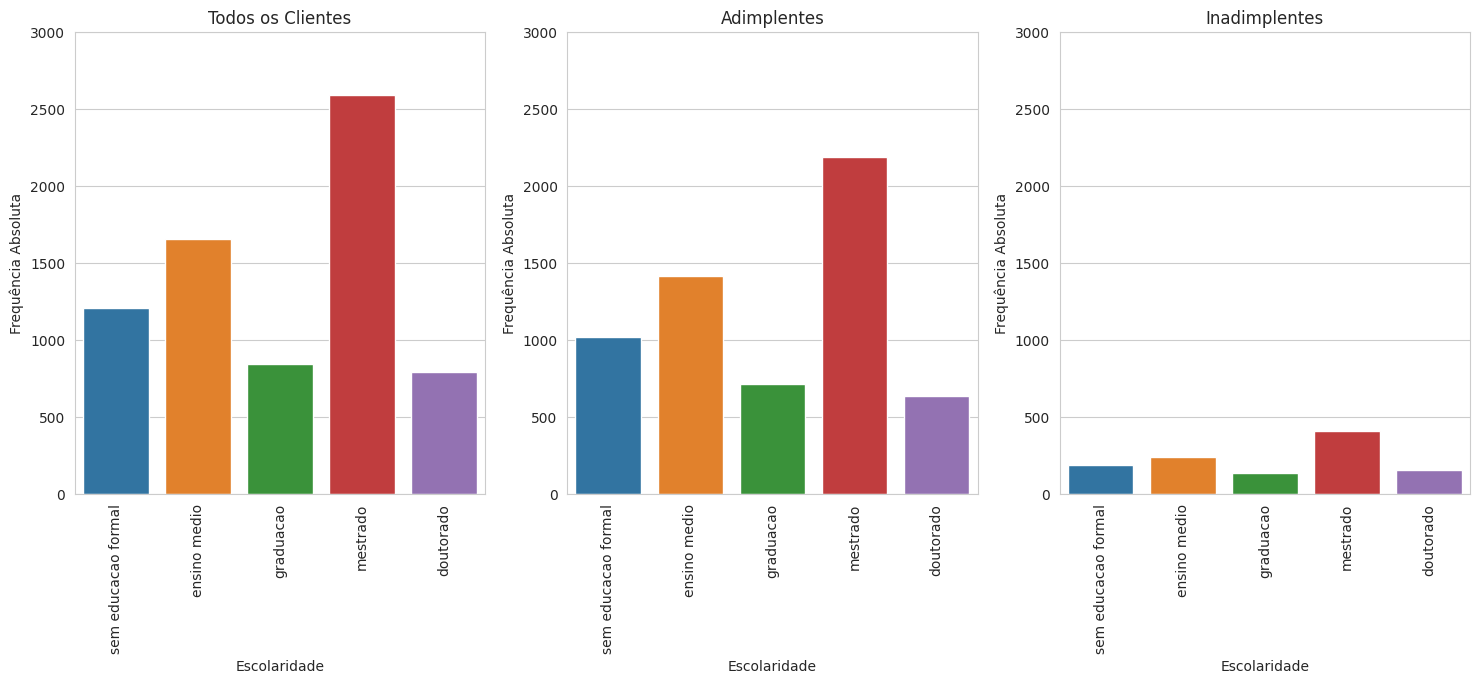

In [271]:
# estilo definido
sns.set_style("whitegrid")

# definindo a ordem desejada para os níveis de escolaridade
ordem_escolaridade = ['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.countplot(data=df, x='escolaridade', ax=ax[0], order=ordem_escolaridade)
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Escolaridade')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 3000])  
ax[0].tick_params(axis='x', rotation=90)

# subplot para default igual a 0
sns.countplot(data=df[df['default']==0], x='escolaridade', ax=ax[1], order=ordem_escolaridade)
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Escolaridade')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 3000])  
ax[1].tick_params(axis='x', rotation=90)

# subplot para default igual a 1
sns.countplot(data=df[df['default']==1], x='escolaridade', ax=ax[2], order=ordem_escolaridade)
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Escolaridade')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 3000])  
ax[2].tick_params(axis='x', rotation=90)

# exibindo os subplots
plt.show()

- **Estado Civil**

O estado civil mostrou uma pequena diferença como mostrado no gráfico abaixo, foi calculado a proporção abaixo do gráfico para ajudar a entender melhor essa diferença.

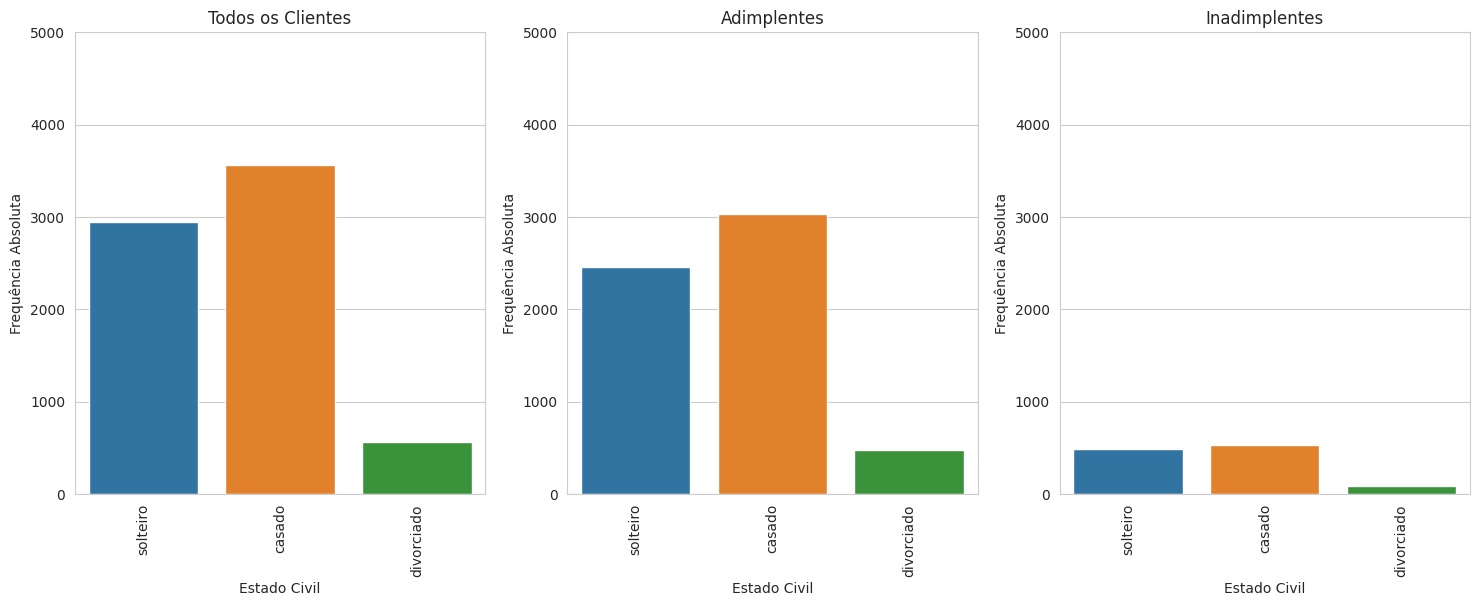

In [272]:
# estilo definido
sns.set_style("whitegrid")

# definindo a ordem desejada para os níveis de estado_civil
ordem_estado_civil = ['solteiro', 'casado', 'divorciado']

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.countplot(data=df, x='estado_civil', ax=ax[0], order=ordem_estado_civil)
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Estado Civil')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 5000])  
ax[0].tick_params(axis='x', rotation=90)

# subplot para default igual a 0
sns.countplot(data=df[df['default']==0], x='estado_civil', ax=ax[1], order=ordem_estado_civil)
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Estado Civil')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 5000])  
ax[1].tick_params(axis='x', rotation=90)

# subplot para default igual a 1
sns.countplot(data=df[df['default']==1], x='estado_civil', ax=ax[2], order=ordem_estado_civil)
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Estado Civil')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 5000])  
ax[2].tick_params(axis='x', rotation=90)



# exibindo os subplots
fig.show()

In [273]:
q_casados_geral, _ =df[df['estado_civil']=='casado'].shape
q_casados_adimplentes, _ =df_default_0[df_default_0['estado_civil']=='casado'].shape
q_casados_inadimplentes, _ =df_default_1[df_default_1['estado_civil']=='casado'].shape

q_solteiro_geral, _ =df[df['estado_civil']=='solteiro'].shape
q_solteiro_adimplentes, _ =df_default_0[df_default_0['estado_civil']=='solteiro'].shape
q_solteiro_inadimplentes, _ =df_default_1[df_default_1['estado_civil']=='solteiro'].shape

q_total_novo
q_adimplentes_novo
print(f'{q_adimplentes_novo} {q_solteiro_adimplentes}')

print(f'Proporção casados geral: {round((q_casados_geral/q_total_novo)*100, 2)}% \nProporção casados adimplentes: {round((q_casados_adimplentes/q_adimplentes_novo)*100, 2)}%\nQuantidade casados inadimplentes: {round((q_casados_inadimplentes/q_inadimplentes_novo)*100, 2)}%')
print(f'\nProporção solteiros geral: {round((q_solteiro_geral/q_total_novo)*100, 2)}% \nProporção solteiros adimplentes: {round((q_solteiro_adimplentes/q_adimplentes_novo)*100, 2)}%\nProporção solteiros inadimplentes: {round((q_solteiro_inadimplentes/q_inadimplentes_novo)*100, 2)}%')

5968 3275
Proporção casados geral: 50.33% 
Proporção casados adimplentes: 66.66%
Quantidade casados inadimplentes: 63.7%

Proporção solteiros geral: 41.63% 
Proporção solteiros adimplentes: 54.88%
Proporção solteiros inadimplentes: 60.02%


Aqui é possível ver que há uma pequena diferença dos inadimplentes tanto no estado civil casado como a de solteiro, essa diferança pode ser comparada a quantidade total e a quantidade de adimplentes, levando a consideração a soma da diferença de casados e solteiros de adimplentes e inadimplentes, temos um total de 8,1% e levando em consideração que o total de casados e solteiros tem a maior proporção diante dos divorciados, essa quantidade de 8,1% é algo pouco, porém pode ser levado em consideração para a compreensão total dos clientes que são inadimplentes.

- **Salário Anual**

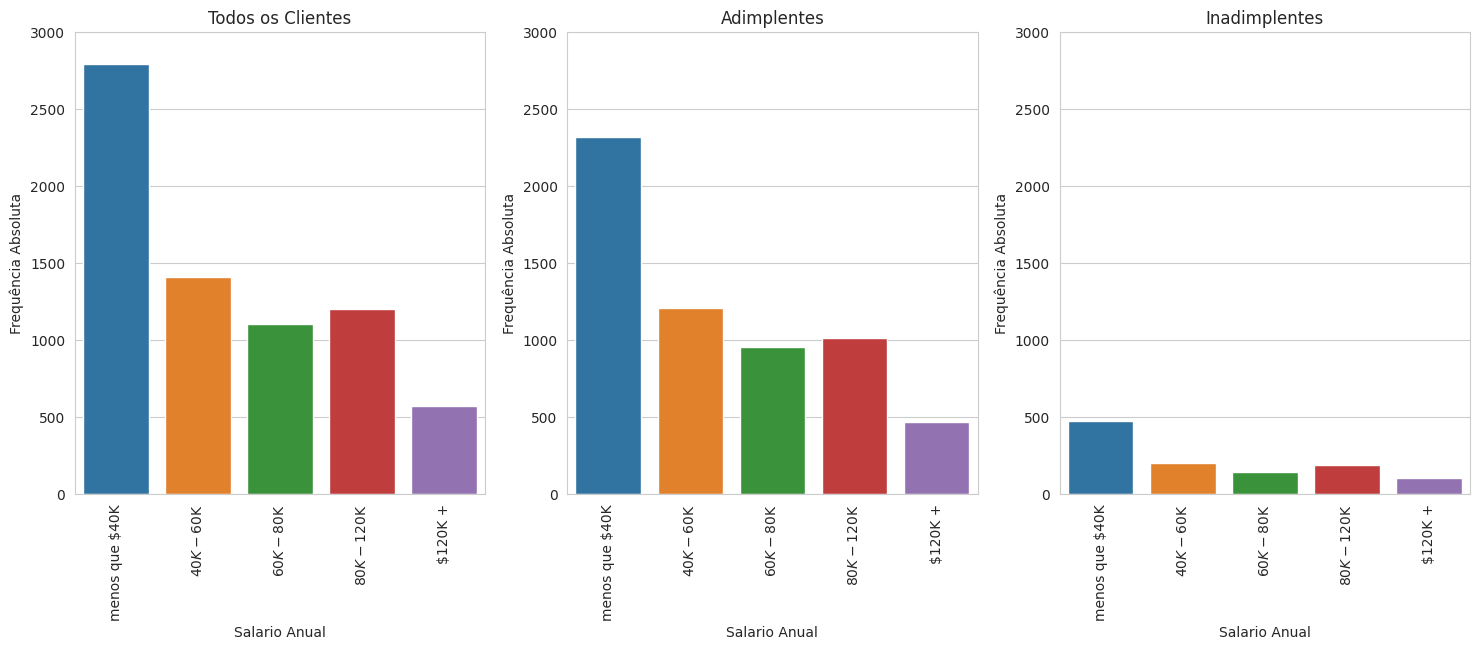

In [274]:
# estilo definido
sns.set_style("whitegrid")

# definindo a ordem desejada para os níveis de salario_anual
ordem_salario_anual = ['menos que $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.countplot(data=df, x='salario_anual', ax=ax[0], order=ordem_salario_anual)
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Salario Anual')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 3000])  
ax[0].tick_params(axis='x', rotation=90)

# subplot para default igual a 0
sns.countplot(data=df[df['default']==0], x='salario_anual', ax=ax[1], order=ordem_salario_anual)
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Salario Anual')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 3000])  
ax[1].tick_params(axis='x', rotation=90)

# subplot para default igual a 1
sns.countplot(data=df[df['default']==1], x='salario_anual', ax=ax[2], order=ordem_salario_anual)
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Salario Anual')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 3000])  
ax[2].tick_params(axis='x', rotation=90)



# exibindo os subplots
fig.show()

- **Tipo do Cartão**

Como visualmente não ficou claro a quantidade de clientes que usam o cartão do tipo gold e platinum, foi utilizado o método `groupby` em conjunto com o `size` para ter uma contagem de cada cartão, dividido em adimplentes e inadimplentes.

In [275]:
cartao_count_default_1 = df[df["default"] == 1].groupby("tipo_cartao").size()
cartao_count_default_0 = df[df["default"] == 0].groupby("tipo_cartao").size()
print('Clientes ADIMPLENTES')
print(cartao_count_default_0)
print('\n')
print('Clientes INADIMPLENTES')
print(cartao_count_default_1)

Clientes ADIMPLENTES
tipo_cartao
blue        5564
gold          68
platinum       8
silver       328
dtype: int64


Clientes INADIMPLENTES
tipo_cartao
blue        1034
gold          13
platinum       3
silver        63
dtype: int64


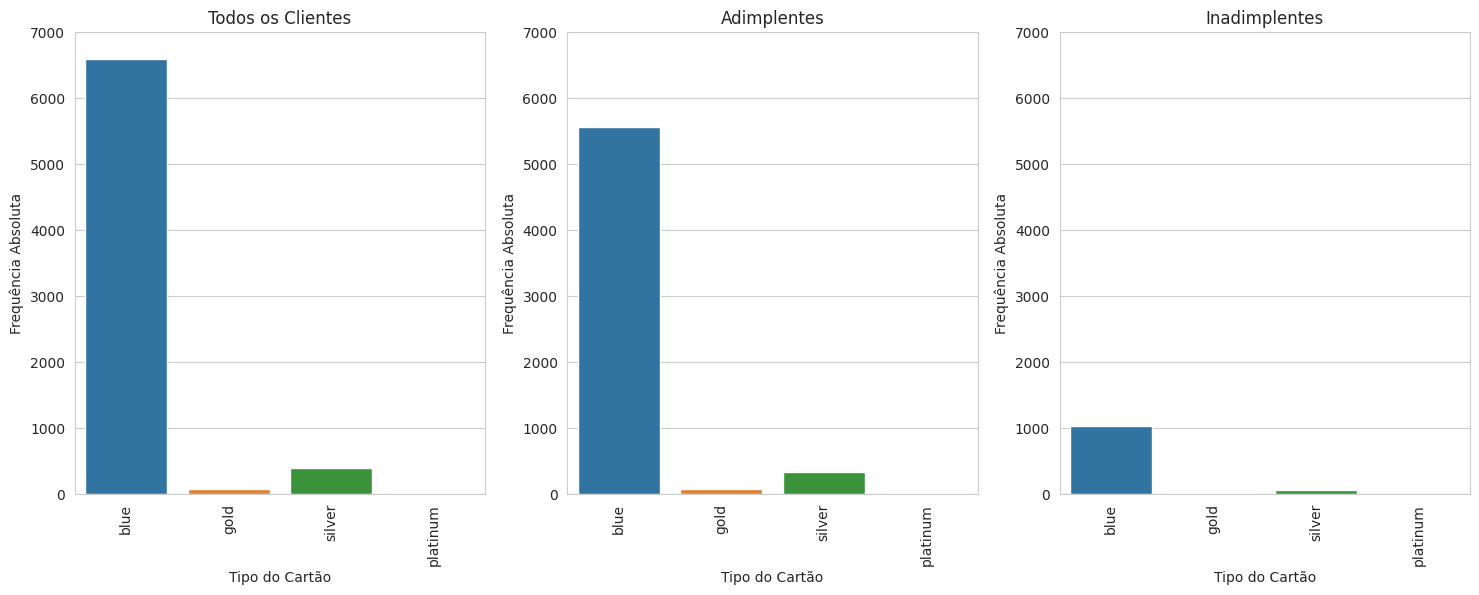

In [276]:
# estilo definido
sns.set_style("whitegrid")

# definindo a ordem desejada para os níveis de salario_anual
ordem_tipo_cartao = ['blue', 'gold', 'silver', 'platinum']

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.countplot(data=df, x='tipo_cartao', ax=ax[0], order=ordem_tipo_cartao)
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Tipo do Cartão')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 7000])  
ax[0].tick_params(axis='x', rotation=90)

# subplot para default igual a 0
sns.countplot(data=df[df['default']==0], x='tipo_cartao', ax=ax[1], order=ordem_tipo_cartao)
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Tipo do Cartão')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 7000])  
ax[1].tick_params(axis='x', rotation=90)

# subplot para default igual a 1
sns.countplot(data=df[df['default']==1], x='tipo_cartao', ax=ax[2], order=ordem_tipo_cartao)
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Tipo do Cartão')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 7000])  
ax[2].tick_params(axis='x', rotation=90)



# exibindo os subplots
fig.show()

Com exceção do gráfico de estado civil, que da um pequeno desvio na relação de adimplentes e inadimplentes, os demais gráficos acompanham em proporção e não dão respostas quanto aos cliente inadimplentes.

### 4.2. Visualizações Numéricas

- **Idade**

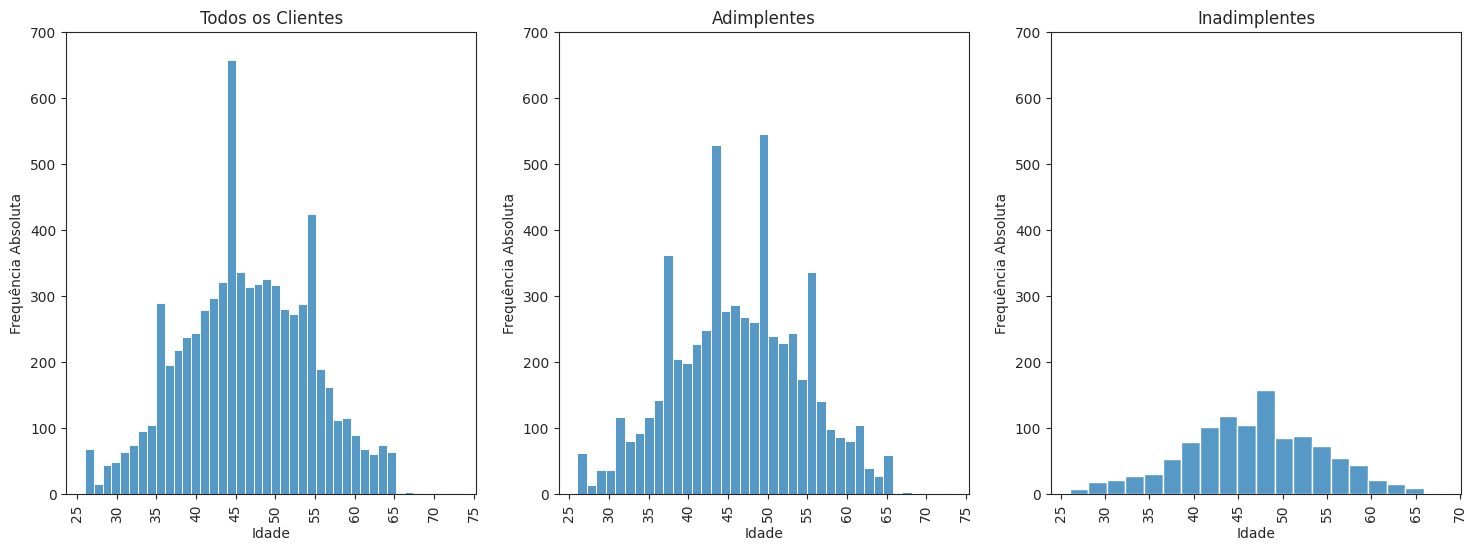

In [277]:
# estilo definido
sns.set_style("ticks")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.histplot(data=df, x='idade', ax=ax[0])
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 700])  
ax[0].tick_params(axis='x', rotation=90)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 0
sns.histplot(data=df[df['default']==0], x='idade', ax=ax[1])
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 700])  
ax[1].tick_params(axis='x', rotation=90)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 1
sns.histplot(data=df[df['default']==1], x='idade', ax=ax[2])
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Idade')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 700])  
ax[2].tick_params(axis='x', rotation=90)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(5)) # Colocando mais valores no eixo X para ajudar na visualização


plt.show()

Nos gráficos de idade podemos ver que o gráfico geral e o de adimplentes tem alguns picos, porém são em idades especificas e isso é dado a quantidade de idades possíveis, mas no geral a proporção dos três gráficos acompanha a mesma curvatura.

- **Dependentes**

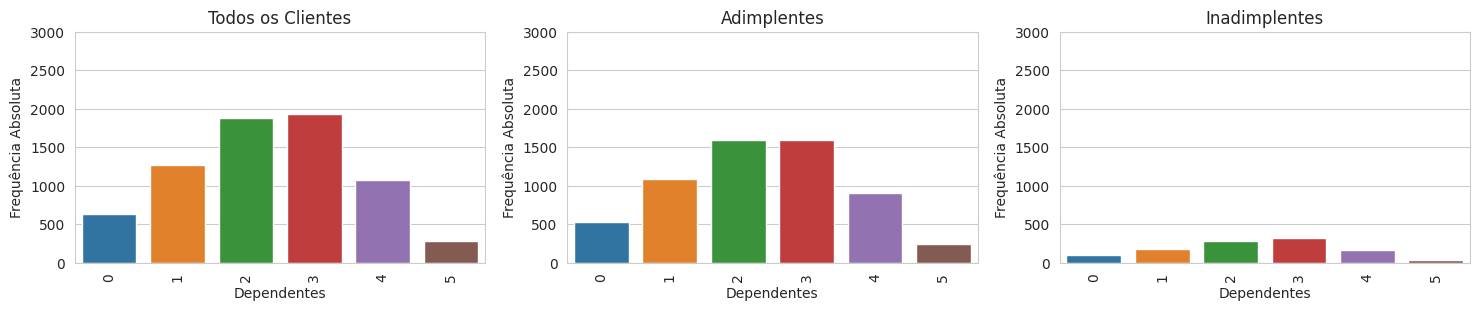

In [299]:
# estilo definido
sns.set_style("whitegrid")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,3))


# subplot para todos os valores de default
sns.countplot(data=df, x='dependentes', ax=ax[0])
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Dependentes')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 3000])  
ax[0].tick_params(axis='x', rotation=90)


# subplot para default igual a 0
sns.countplot(data=df[df['default']==0], x='dependentes', ax=ax[1])
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Dependentes')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 3000])  
ax[1].tick_params(axis='x', rotation=90)


# subplot para default igual a 1
sns.countplot(data=df[df['default']==1], x='dependentes', ax=ax[2])
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Dependentes')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 3000])  
ax[2].tick_params(axis='x', rotation=90)



plt.show()

- **Meses de Relacionamento**

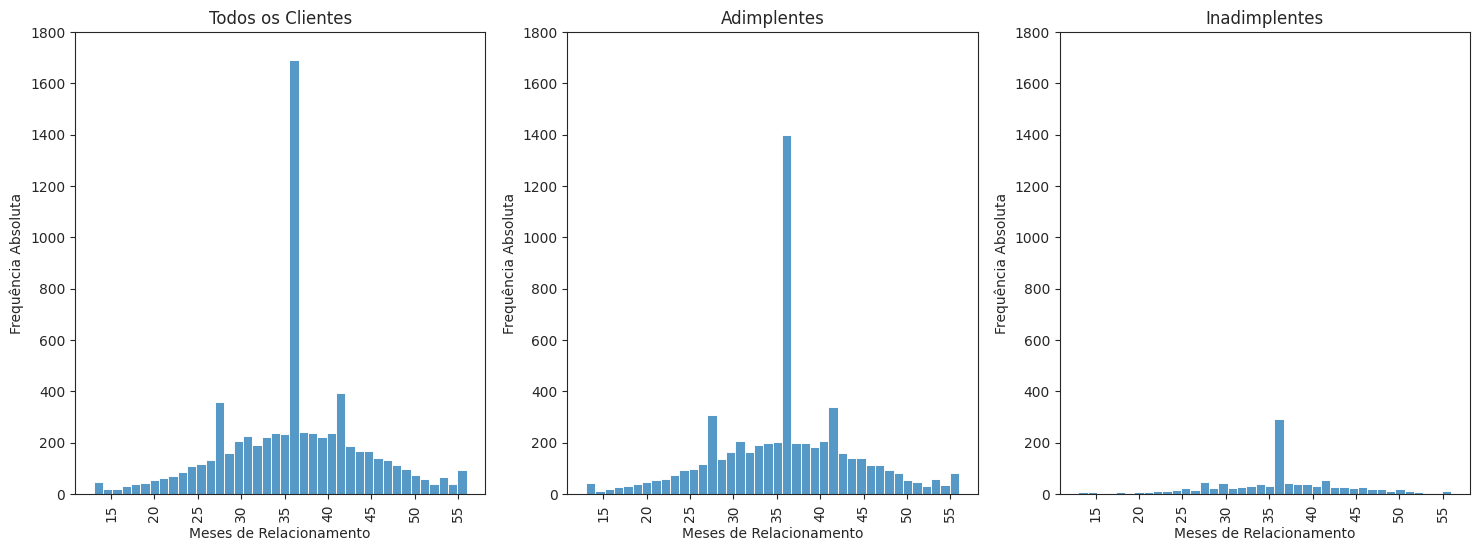

In [288]:
# estilo definido
sns.set_style("ticks")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.histplot(data=df, x='meses_de_relacionamento', ax=ax[0], bins=40)
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Meses de Relacionamento')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 1800])  
ax[0].tick_params(axis='x', rotation=90)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 0
sns.histplot(data=df[df['default']==0], x='meses_de_relacionamento', ax=ax[1], bins=40)
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Meses de Relacionamento')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 1800])  
ax[1].tick_params(axis='x', rotation=90)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 1
sns.histplot(data=df[df['default']==1], x='meses_de_relacionamento', ax=ax[2], bins=40)
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Meses de Relacionamento')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 1800])  
ax[2].tick_params(axis='x', rotation=90)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(5)) # Colocando mais valores no eixo X para ajudar na visualização


plt.show()

Da mesma maneira que a idade, temos alguns picos devido a quantidade de dados de meses possiveis de relacionamento em relação ao número de clientes, porém a proporção acompanha nos três gráficos.

- **Quantidade de Produtos**

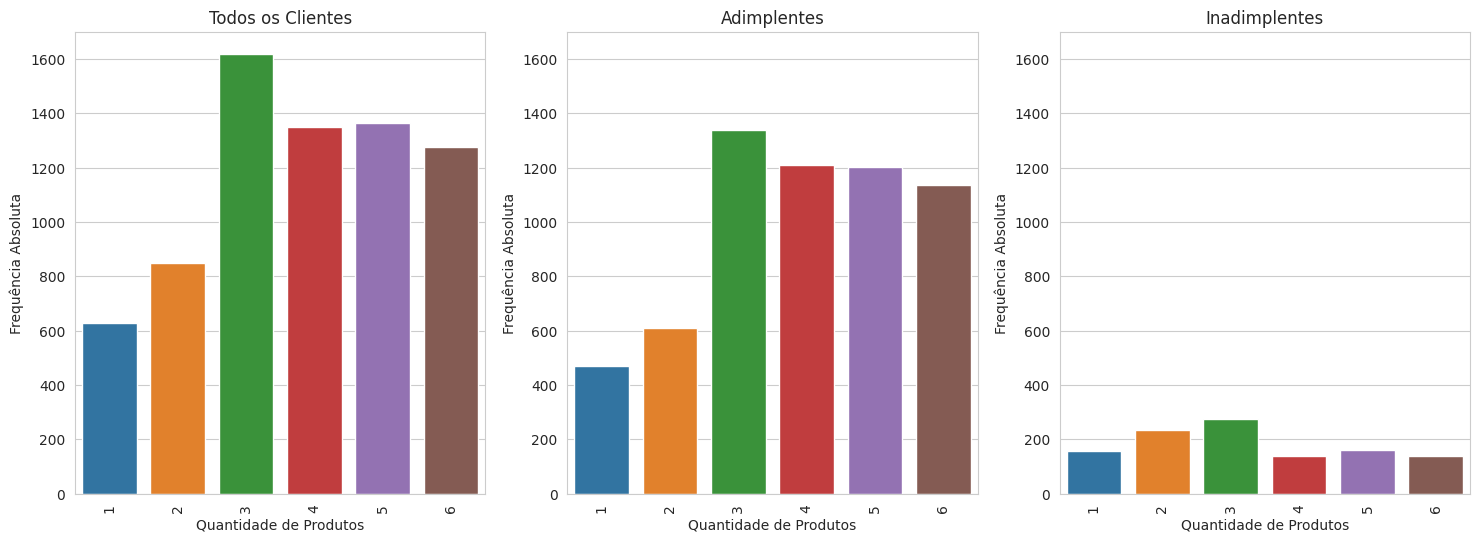

In [300]:
# estilo definido
sns.set_style("whitegrid")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.countplot(data=df, x='qtd_produtos', ax=ax[0])
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Quantidade de Produtos')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 1700])  
ax[0].tick_params(axis='x', rotation=90)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 0
sns.countplot(data=df[df['default']==0], x='qtd_produtos', ax=ax[1])
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Quantidade de Produtos')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 1700])  
ax[1].tick_params(axis='x', rotation=90)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 1
sns.countplot(data=df[df['default']==1], x='qtd_produtos', ax=ax[2])
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Quantidade de Produtos')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 1700])  
ax[2].tick_params(axis='x', rotation=90)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização


plt.show()

- **Iterações**

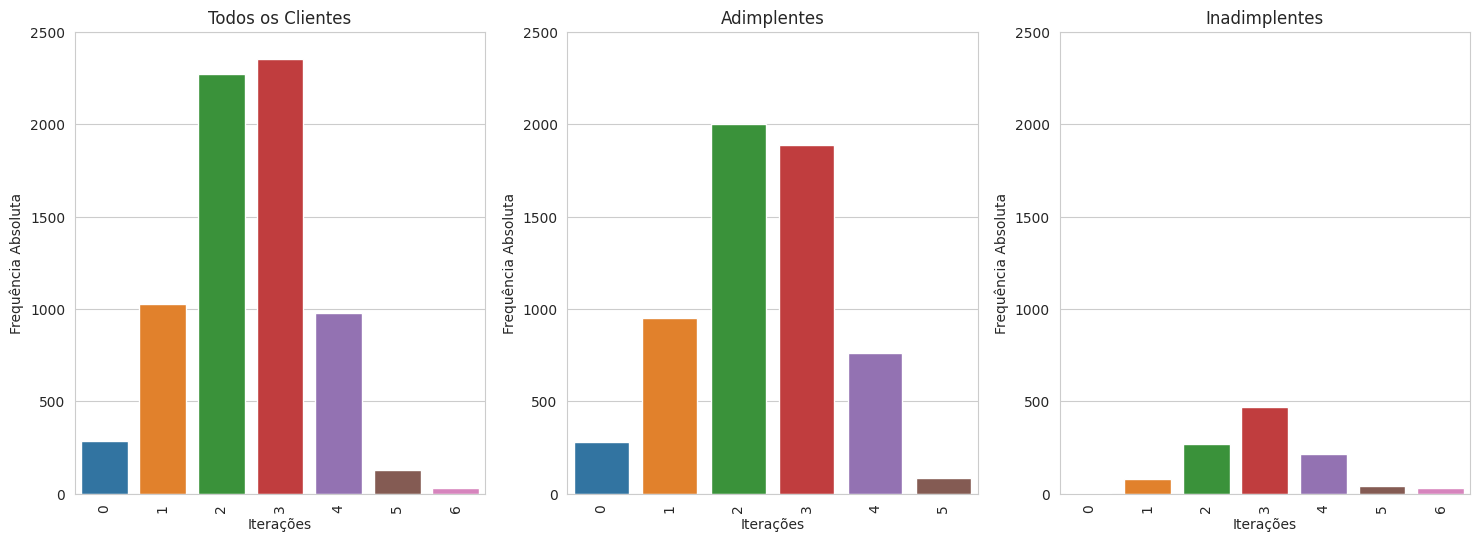

In [301]:


# estilo definido
sns.set_style("whitegrid")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.countplot(data=df, x='iteracoes_12m', ax=ax[0])
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Iterações')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 2500])  
ax[0].tick_params(axis='x', rotation=90)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 0
sns.countplot(data=df[df['default']==0], x='iteracoes_12m', ax=ax[1])
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Iterações')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 2500])  
ax[1].tick_params(axis='x', rotation=90)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 1
sns.countplot(data=df[df['default']==1], x='iteracoes_12m', ax=ax[2])
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Iterações')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 2500])  
ax[2].tick_params(axis='x', rotation=90)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização


plt.show()

Aui o número de iterações dos clientes inadimplentes é um pouco diferente, com o valor de 1 nas iterações sendo menos que a metade de 4 iterações e com o valor de 2 iterações sendo bem menor que a de 3 iterações, fugindo do padrão geral e dos adimplentes, porém o volume maior de iterações continua concentrada no valor mediano de iterações e não trás uma informação clara sobre o caso de inadimplencia.

- **Meses Inativo**

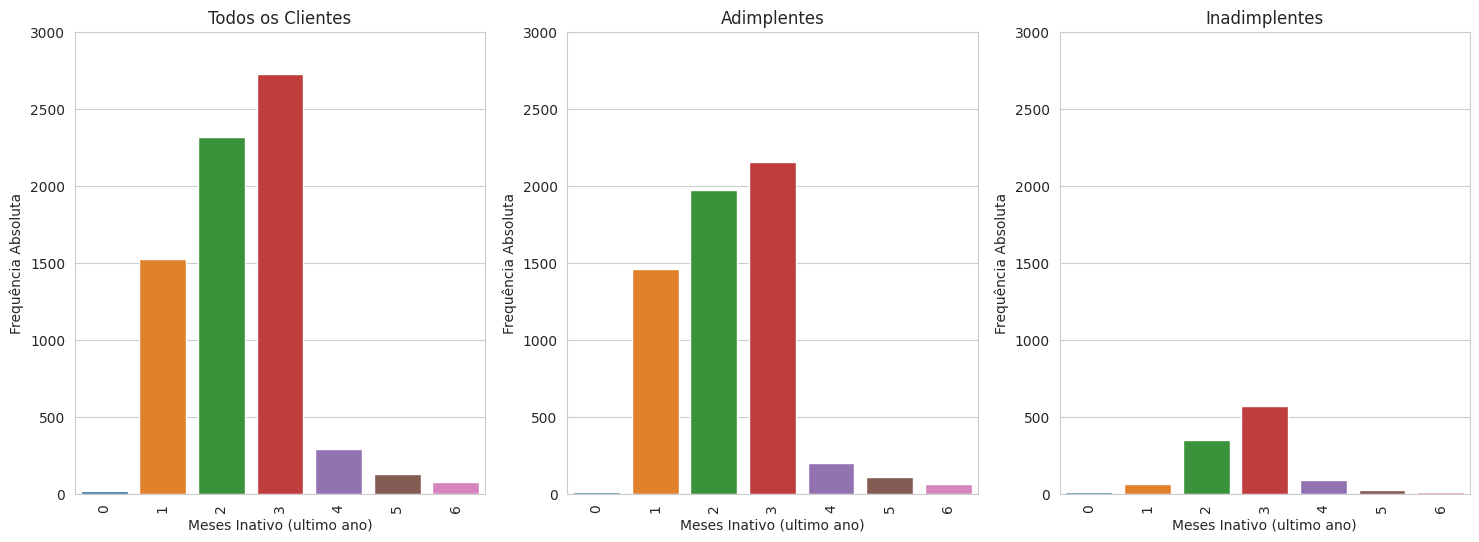

In [302]:
# estilo definido
sns.set_style("whitegrid")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.countplot(data=df, x='meses_inativo_12m', ax=ax[0])
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Meses Inativo (ultimo ano)')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 3000])  
ax[0].tick_params(axis='x', rotation=90)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 0
sns.countplot(data=df[df['default']==0], x='meses_inativo_12m', ax=ax[1])
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Meses Inativo (ultimo ano)')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 3000])  
ax[1].tick_params(axis='x', rotation=90)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização

# subplot para default igual a 1
sns.countplot(data=df[df['default']==1], x='meses_inativo_12m', ax=ax[2])
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Meses Inativo (ultimo ano)')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 3000])  
ax[2].tick_params(axis='x', rotation=90)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(1)) # Colocando mais valores no eixo X para ajudar na visualização


plt.show()

- **Limite de Crédito**

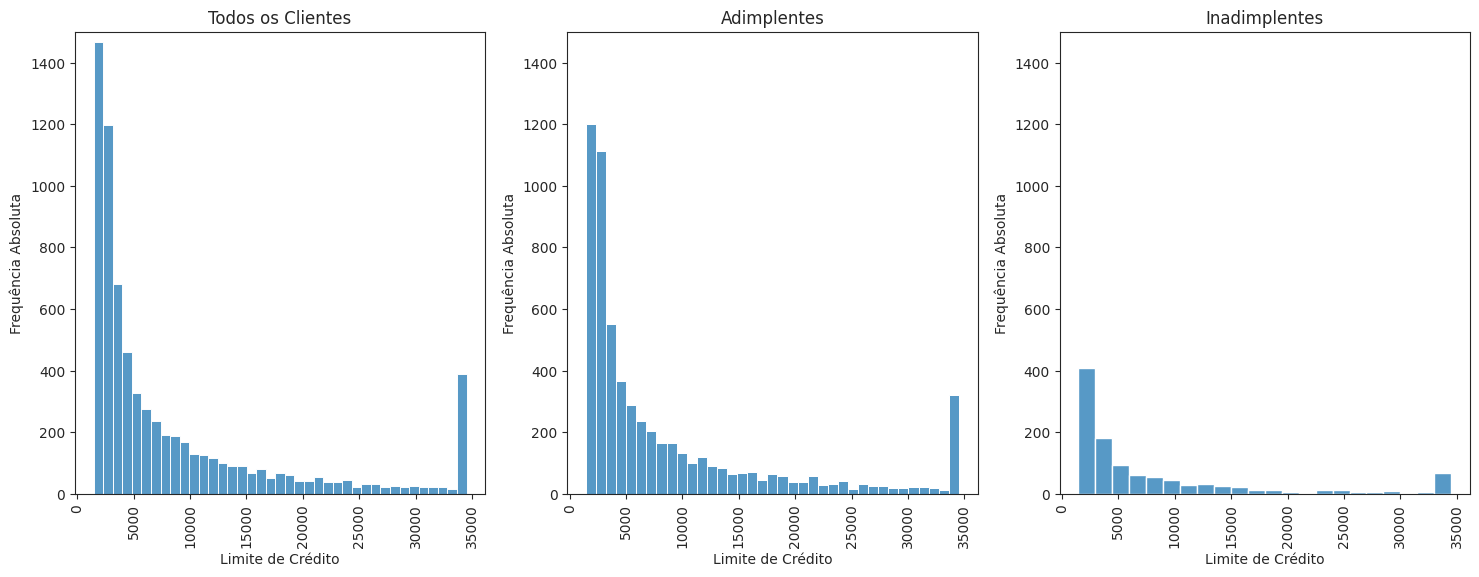

In [318]:
# estilo definido
sns.set_style("ticks")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.histplot(data=df, x='limite_credito', ax=ax[0])
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Limite de Crédito')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 1500])  
ax[0].tick_params(axis='x', rotation=90)

# subplot para default igual a 0
sns.histplot(data=df[df['default']==0], x='limite_credito', ax=ax[1])
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Limite de Crédito')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 1500])  
ax[1].tick_params(axis='x', rotation=90)


# subplot para default igual a 1
sns.histplot(data=df[df['default']==1], x='limite_credito', ax=ax[2])
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Limite de Crédito')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 1500])  
ax[2].tick_params(axis='x', rotation=90)

plt.show()

- **Valor das Transações Anual**

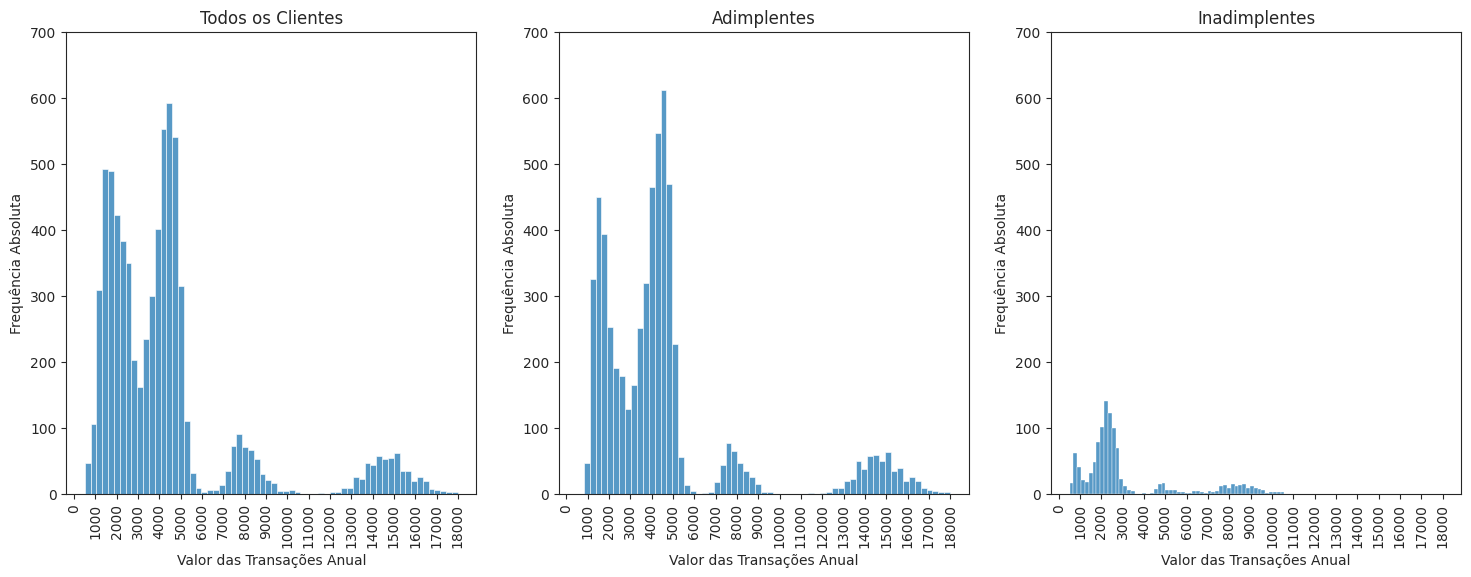

In [322]:
# estilo definido
sns.set_style("ticks")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6), sharex=True)

# subplot para todos os valores de default
sns.histplot(data=df, x='valor_transacoes_12m', ax=ax[0])
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Valor das Transações Anual')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 700])  
ax[0].tick_params(axis='x', rotation=90)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(1000)) # Colocando mais valores no eixo X para ajudar na visualização



# subplot para default igual a 0
sns.histplot(data=df[df['default']==0], x='valor_transacoes_12m', ax=ax[1])
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Valor das Transações Anual')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 700])  
ax[1].tick_params(axis='x', rotation=90)


# subplot para default igual a 1
sns.histplot(data=df[df['default']==1], x='valor_transacoes_12m', ax=ax[2])
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Valor das Transações Anual')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 700])  
ax[2].tick_params(axis='x', rotation=90)

plt.show()

Os valores das transações trazem uma informação importante a respeito da margem de valor dessas transações, enquanto os clientes adimplentes tem transações com picos entre 1300 a 2500, de 3600 a 5000 e isoladamente tem valores entre 12000 e 18000, os clientes inadimplentes tem valores de transações por volta de 2000 a 2500, proporcionalmente os valores entre 700 a 1000 também são maiores e não existe inadimplentes que fação transações mais altas como os adimplentes.

Com isso podemos concluir que existem faixas de transações que são mais usadas por inadimplentes, proporcionalmente analisado e que tem faixa de valores que inadimplentes não utilizam.

Para ficar visualmente claro essa informação, podemos analisar o gráfico de todos os clientes com o gráfico de adimplentes e perceber que existe uma diferença maior no inicio dos valores, enquanto no restante do gráfico ambos estão bem similares, isso se deve pela concentração de inadimplentes nesses valores mais baixos.

- **Transações nos Últimos  12 Meses**

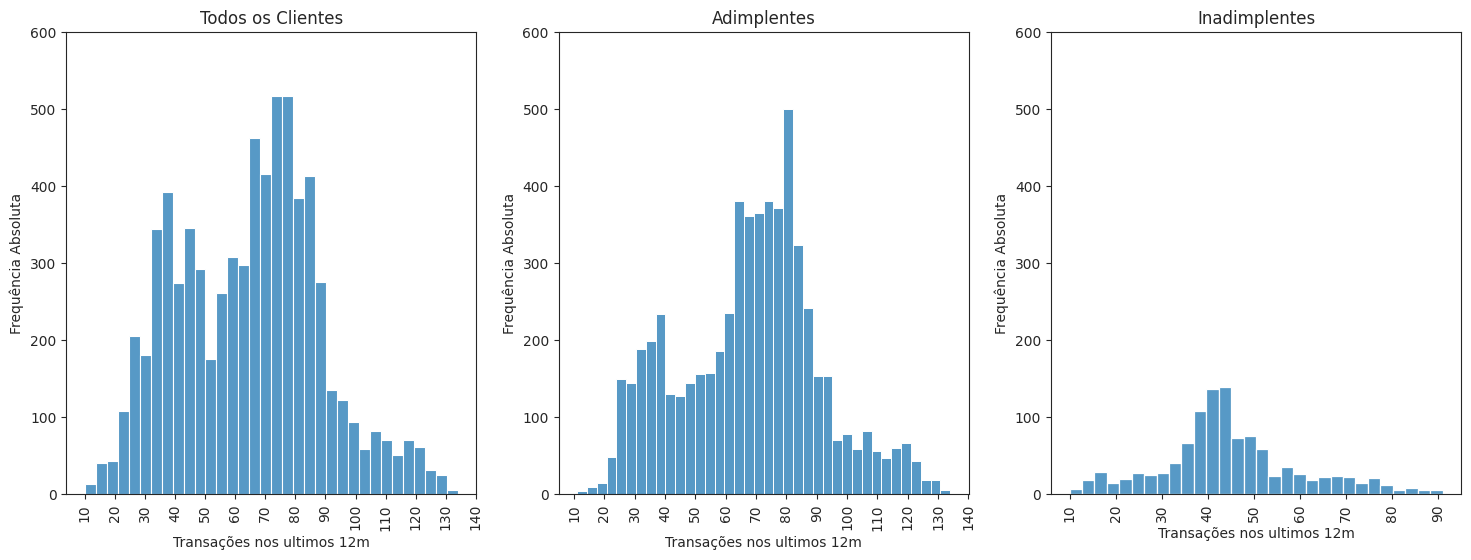

In [280]:
# estilo definido
sns.set_style("ticks")

# criando três subplots lado a lado (ax vai ser uma matriz de 1 por 3)
fig, ax =plt.subplots(1, 3, figsize=(18,6))

# subplot para todos os valores de default
sns.histplot(data=df, x='qtd_transacoes_12m', ax=ax[0])
ax[0].set_title('Todos os Clientes')
ax[0].set_xlabel('Transações nos ultimos 12m')
ax[0].set_ylabel('Frequência Absoluta')
ax[0].set_ylim([0, 600])  
ax[0].tick_params(axis='x', rotation=90)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(10)) # Colocando mais valores no eixo X para ajudar na visualização


# subplot para default igual a 0
sns.histplot(data=df[df['default']==0], x='qtd_transacoes_12m', ax=ax[1])
ax[1].set_title('Adimplentes')
ax[1].set_xlabel('Transações nos ultimos 12m')
ax[1].set_ylabel('Frequência Absoluta')
ax[1].set_ylim([0, 600])  
ax[1].tick_params(axis='x', rotation=90)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(10)) # Colocando mais valores no eixo X para ajudar na visualização


# subplot para default igual a 1
sns.histplot(data=df[df['default']==1], x='qtd_transacoes_12m', ax=ax[2])
ax[2].set_title('Inadimplentes')
ax[2].set_xlabel('Transações nos ultimos 12m')
ax[2].set_ylabel('Frequência Absoluta')
ax[2].set_ylim([0, 600])  
ax[2].tick_params(axis='x', rotation=90)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(10)) # Colocando mais valores no eixo X para ajudar na visualização

plt.show()

Aqui é possível perceber uma diferença entre os clientes adimplentes e inadimplentes em suas quantidades de transações; Os clientes adimplentes tem dois picos em suas quantidades sendo entre 25 a 40 e de 65 a 85, sendo que os clientes inadimplentes tem um pico apenas do 35 ao 50, 52 transações aproximadamente. No gráfico podemos ver que tem um espaço entre o 41 até o 60 mais ou menos que é ocupado pelos clientes inadimplentes quando olhamos para o gráfico com todos os clientes, então os clientes que tem essa margem de transações tem uma maior probabilidade de se tornar inadimplente.

- **Relação Valor Transações e Quantidade Transações**

Visto que em ambos os casos de quantidade de transações e dos valores das transações houve casos de valores mais isolados para cliente inadimplentes, foi feito um gráfico de relação entre valor e quantidade.

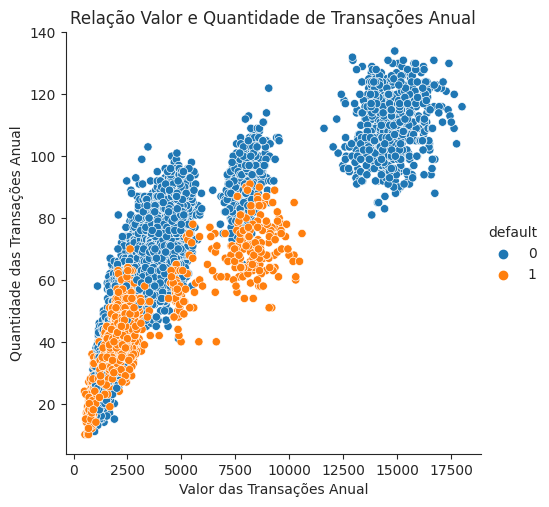

In [324]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação Valor e Quantidade de Transações Anual', 
    xlabel='Valor das Transações Anual', 
    ylabel='Quantidade das Transações Anual'
  )

Com o gráfico de relação fica bem claro que clientes que transacionam muito, tendem a ser adimplentes, mesmo em valores mais baixos e em valores mais altos junto com a alta quantidade de transações são em sua totalidade adimplentes; Já os clientes que tem uma quantidade e valor de transações medianas são bem propicios a ser inadimplentes e clientes que transacionam menos, mesmo que com valores reduzidos, também são mais sucetiveis a serem inadimplentes.

## 4\. Conclusões

Todas as colunas foram exploradas uma a uma e cada tipo de dado foi explorado e eventualmente corrigido de acordo com a necessidade. Sendo a etapa de exploração de uso não apenas para entender os dados que estão sendo manipulados, mas qual tipo de manipulação e visualização que vai ser feita futuramente.

Todas as colunas foram representadas graficamente para análise e entendimento da situação, não considerando qualquer tipo de enviesamento, mas analisando as informações coluna a coluna. Na grande maior parte dos casos a proporção segue muito semelhante, não sendo possível qualquer tipo de conclusão, porém em alguns casos pode se perceber um padrão de comportamento como a quantidade de transações e os valores das transações vistos nos últimos gráficos, sendo também os de maiores impactos, mas há casos de mínima diferença que também podem ser levados em consideração com um peso menor, como o estado civil que teve uma diferença de quase 10% de um tipo de cliente para outro, podendo elevar mesmo que pouco a probabilidade de acerto no perfil de cliente em foco.